In [ ]:
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib.font_manager
from pandas.plotting import register_matplotlib_converters
%matplotlib inline


import seaborn as sns
sns.set(color_codes=True)
import scipy as sc
from scipy import stats, integrate
from scipy.stats.mstats import mode


from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure


In [ ]:
data = pd.read_csv("/content/poisoned_heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,54.297935,0.646018,0.973451,134.973451,240.719764,0.182891,0.530973,152.834808,0.362832,1.125664,1.374631,0.752212,2.309735,0.557522
std,9.073811,0.478911,1.038833,29.319842,56.388351,0.387148,0.545082,33.012852,0.481528,1.224173,0.628283,1.001753,0.640076,0.497414
min,29.000000,0.000000,0.000000,94.000000,98.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,206.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,236.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,272.000000,0.000000,1.000000,168.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,350.000000,564.000000,1.000000,2.000000,358.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.drop(columns=['sex','fbs','exang','target'],inplace=True)   #no outliers in binary features

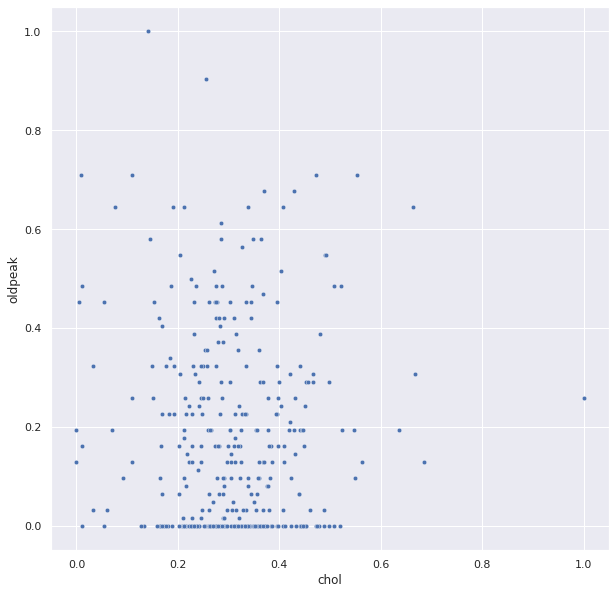

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scal = MinMaxScaler(feature_range=(0, 1))
data_tr= scal.fit_transform(data)

data_tr = pd.DataFrame(data_tr, columns = data.columns.to_list())

s, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=data_tr, x = 'chol',y= 'oldpeak', s=20)

In [ ]:
! pip install pyod

     |████████████████████████████████| 113 kB 4.0 MB/s 
  Created wheel for pyod: filename=pyod-0.9.5-py3-none-any.whl size=132699 sha256=a4a6a184037a3568c3ef120f386583f8032b3e32da8c1708e73e244b6f9efd63
  Stored in directory: /root/.cache/pip/wheels/3d/bb/b7/62b60fb451b33b0df1ab8006697fba7a6a49709a629055cf77
Successfully built pyod


In [ ]:
from pyod.models.knn import KNN # proximity
from pyod.models.hbos import HBOS # proximity


In [ ]:
knn_class = KNN(contamination = 0.5)
knn_class.fit(data_tr)

KNN(algorithm='auto', contamination=0.5, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
scores = knn_class.decision_function(data_tr)  #Raw anamoly answers
scores

array([0.62402457, 0.6599001 , 0.41561301, 0.17155984, 0.3424615 ,
       0.36968642, 0.29873788, 0.34500975, 0.40823944, 0.31621352,
       0.27176752, 0.1805183 , 0.16903607, 0.41693094, 0.38889631,
       0.27452169, 0.28043946, 0.70583769, 0.28856039, 0.5591196 ,
       0.35974633, 0.1573682 , 0.28465034, 0.40211913, 0.53401911,
       0.5299349 , 0.3318111 , 0.24411176, 0.45756881, 0.5500618 ,
       0.27577843, 0.33208696, 0.33851567, 0.59250005, 0.42016222,
       0.55927159, 0.22351257, 0.43383122, 0.29464445, 0.38553209,
       0.39403047, 0.31544713, 0.42068963, 0.26623185, 0.2977743 ,
       0.22316338, 0.21203236, 0.17206136, 0.69981745, 0.16674898,
       0.20427908, 0.36941015, 0.54150722, 0.27249648, 0.2941848 ,
       0.29661303, 0.15371088, 0.21575554, 0.46946978, 0.29378043,
       0.42176278, 0.34694655, 0.59127098, 0.48003249, 0.25160668,
       0.37050782, 0.27249648, 0.35027238, 0.16857088, 0.33202426,
       0.37771992, 0.42985313, 0.45644651, 0.15867731, 0.25966

In [ ]:
table1 = data_tr['chol'].values.reshape(-1,1)
table2 = data_tr['trestbps'].values.reshape(-1,1)

X = np.concatenate((table1,table2),axis=1)

array([[0.28969957, 0.19921875],
       [0.32618026, 0.140625  ],
       [0.22746781, 0.140625  ],
       [0.29613734, 0.1015625 ],
       [0.54935622, 0.1015625 ]])

In [ ]:
X = df2[['chol','trestbps']]
X.head()

,chol,trestbps
0,0.244292,0.481132
1,0.283105,0.339623
2,0.178082,0.339623
3,0.251142,0.245283
4,0.520548,0.245283


In feature age, we have 0 outliers
In feature cp, we have 0 outliers
In feature trestbps, we have 21 outliers
In feature chol, we have 12 outliers
In feature restecg, we have 0 outliers
In feature thalach, we have 11 outliers
In feature oldpeak, we have 2 outliers
In feature slope, we have 0 outliers
In feature ca, we have 25 outliers
In feature thal, we have 3 outliers


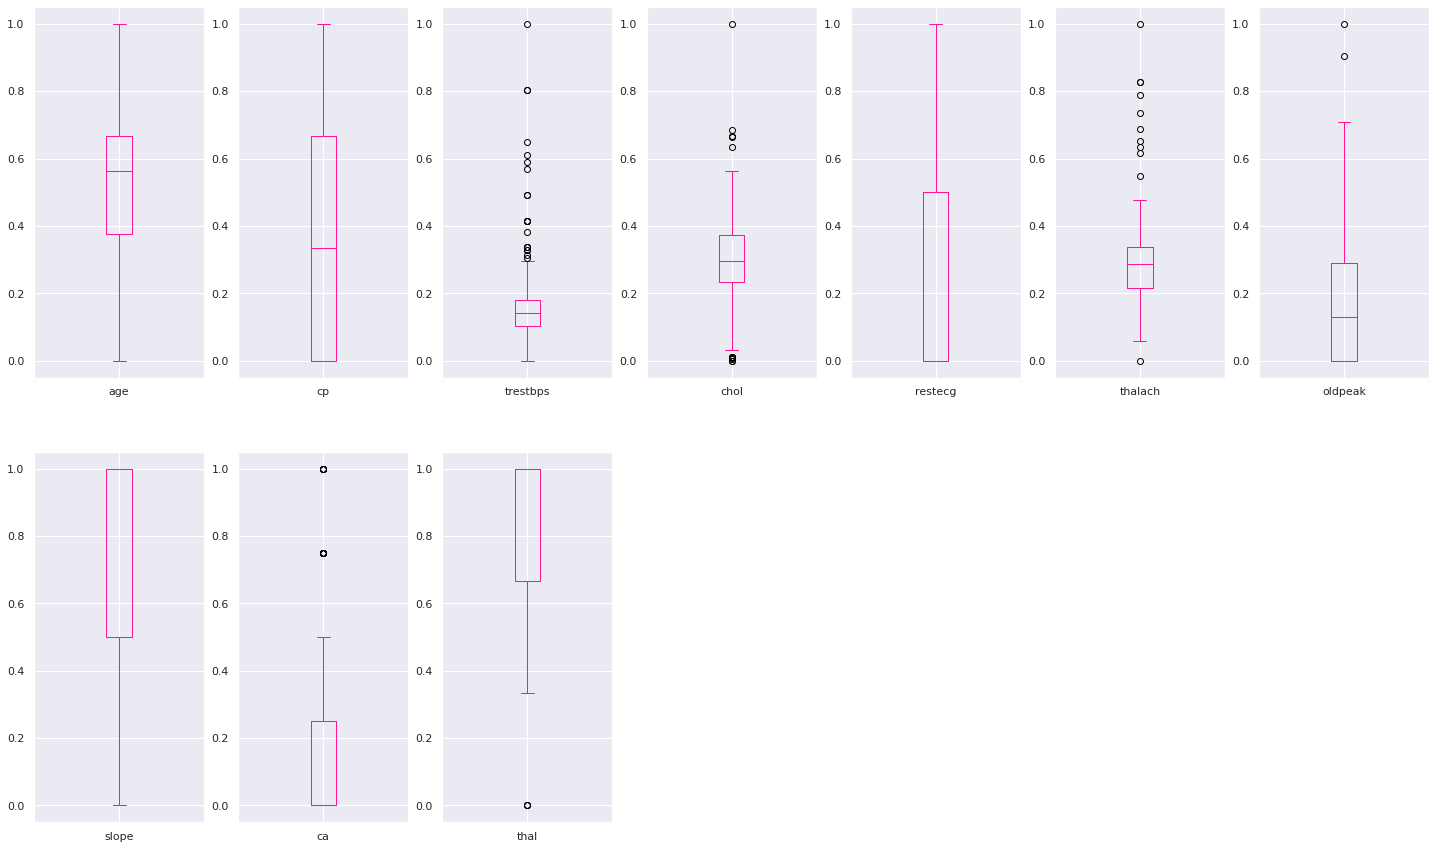

In [ ]:
import plotly.express as px 

data_tr.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(25, 15), 
color='deeppink');

features = ['age','cp','trestbps','chol',	'restecg','thalach','oldpeak','slope','ca','thal']  
def outliers(out_data):
    for feature_name in out_data.columns:
        data = out_data[feature_name]
        Q25 = np.percentile(data, 25.) #25 percentile
        Q75 = np.percentile(data, 75.) #75th percentile
        step = (Q75-Q25) * 1.5 
        outliers = data[~((data >= Q25 - step) & (data <= Q75 + step))].index.tolist()  
        print('In feature {}, we have {} outliers'.format(feature_name, len(outliers)))
        
out_data = data_tr[features]    
outliers(out_data)